In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
diabetes_data <- read.csv("diabetes.csv")
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [3]:
diabetes_data$Patient_number <- seq.int(nrow(diabetes_data)) 

diabetes_select <- select(diabetes_data, Patient_number, Glucose, Insulin, Outcome)
diabetes_select

Patient_number,Glucose,Insulin,Outcome
<int>,<int>,<int>,<int>
1,148,0,1
2,85,0,0
3,183,0,1
⋮,⋮,⋮,⋮
766,121,112,0
767,126,0,1
768,93,0,0


In [4]:
diabetes_count_case<-group_by(diabetes_select,Outcome) |>
    summarize(number_of_cases=n())
diabetes_count_case

diabetes_indicator_mean<-group_by(diabetes_select, Outcome) |>
    summarize(across(Glucose:Insulin, mean))
diabetes_indicator_mean

diabetes_select <- mutate(diabetes_select, Outcome=as_factor(Outcome))
diabetes_split <- initial_split(diabetes_select, prop = 0.75, strata = Outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)

diabetes_train
diabetes_test

Outcome,number_of_cases
<int>,<int>
0,500
1,268


Outcome,Glucose,Insulin
<int>,<dbl>,<dbl>
0,109.9800,68.7920
1,141.2575,100.3358


,Patient_number,Glucose,Insulin,Outcome
,<int>,<int>,<int>,<fct>
2,2,85,0,0
4,4,89,94,0
6,6,116,0,0
⋮,⋮,⋮,⋮,⋮
760,760,190,0,1
762,762,170,0,1
767,767,126,0,1


,Patient_number,Glucose,Insulin,Outcome
,<int>,<int>,<int>,<fct>
9,9,197,543,1
11,11,110,0,0
12,12,168,0,1
⋮,⋮,⋮,⋮,⋮
759,759,106,0,0
765,765,122,0,0
768,768,93,0,0


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


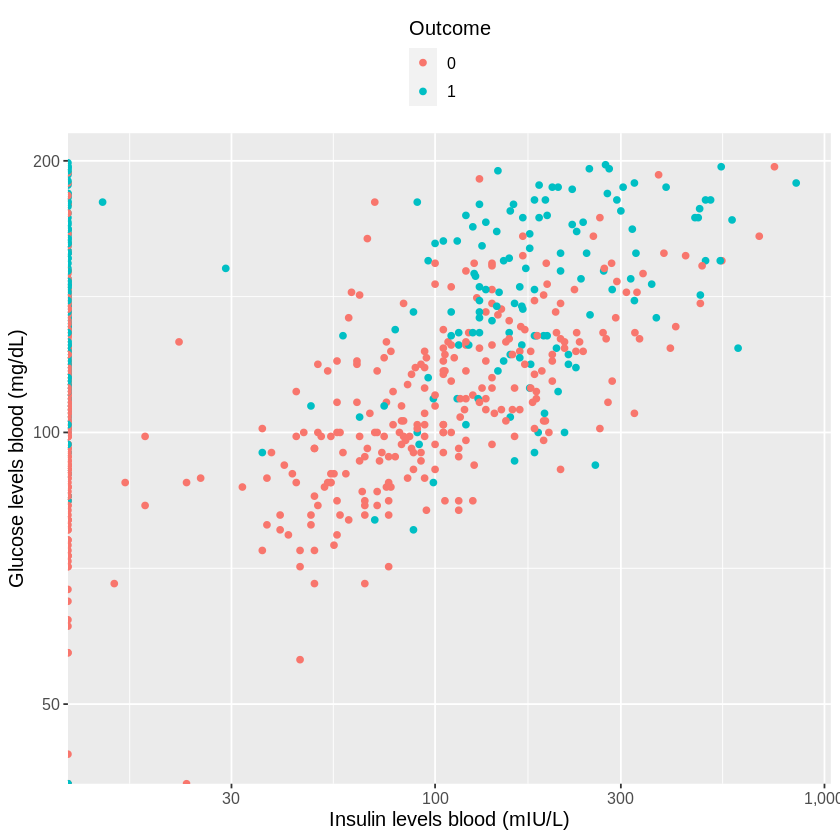

In [12]:

diabetes_select_plot<-ggplot(diabetes_select, aes(x = Insulin, 
                     y = Glucose, 
                     color = Outcome)) +
geom_point() +
xlab("Insulin levels blood (mIU/L)") + 
  ylab("Glucose levels blood (mg/dL)") + 
#title("Glucose Versus Insulin Levels in Blood")
  theme(text = element_text(size = 12),
        legend.position = "top",
        legend.direction = "vertical") +
  scale_x_log10(labels = comma) +
  scale_y_log10(labels = comma)
diabetes_select_plot
